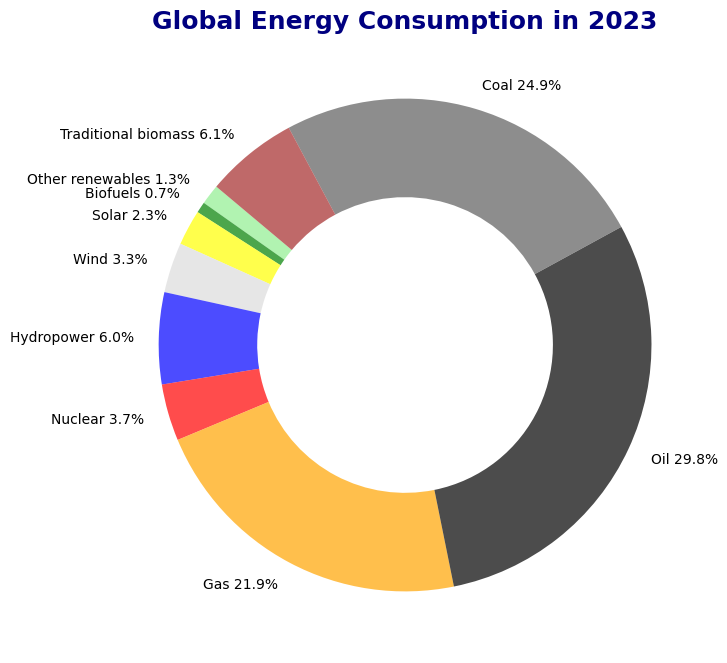

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the dataset
file_path = 'global-energy-substitution.csv'  # Replace with your file path
energy_data = pd.read_csv(file_path)

# Filter data for the year 2023
energy_2023 = energy_data[energy_data['Year'] == 2023]

# Select relevant energy types and their substitution values
energy_columns = [
    'Other renewables', 
    'Biofuels', 
    'Solar', 
    'Wind', 
    'Hydropower', 
    'Nuclear', 
    'Gas', 
    'Oil', 
    'Coal', 
    'Traditional biomass'
]

# Summing up all energy types for 2023
energy_2023_totals = energy_2023[energy_columns].sum().reset_index()
energy_2023_totals.columns = ['Energy Type', 'TWh']

# Filter out energy types with zero values for better visualization
filtered_energy_2023_totals = energy_2023_totals[energy_2023_totals['TWh'] > 0]

# Define the base colors for energy types
base_color_palette = {
    'Other renewables': 'lightgreen',
    'Biofuels': 'green',
    'Solar': 'yellow',
    'Wind': '#dcdcdc',
    'Hydropower': 'blue',
    'Nuclear': 'red',
    'Gas': 'orange',
    'Oil': 'black',
    'Coal': '#5d5d5d',
    'Traditional biomass': 'brown'
}

# Generate gradient colors
gradient_palette = {
    key: mcolors.to_rgba(base_color_palette[key], alpha=0.7) for key in base_color_palette
}
colors = [gradient_palette[energy] for energy in filtered_energy_2023_totals['Energy Type']]

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
texts, autotexts = ax.pie(
    filtered_energy_2023_totals['TWh'],
    labels=[
        f'{label} {percent:.1f}%' for label, percent in zip(
            filtered_energy_2023_totals['Energy Type'],
            (filtered_energy_2023_totals['TWh'] / filtered_energy_2023_totals['TWh'].sum()) * 100
        )
    ],
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

# Set chart title
ax.set_title(
    "Global Energy Consumption in 2023",
    fontsize=18,
    fontweight="bold",
    color="navy"
)

# Enhance the chart aesthetics
plt.setp(autotexts, size=10)

# saev the chart
plt.savefig('energy_substitution_2023.pdf')
# Display the chart
plt.show()


In [ ]:
oil - black
coal - grey
wind - white
hydropower - blue
solar - yellow
biofuels - green
other renewables - light green
traditional biomass - brown
nuclear - red
gas - orange

